# Fitting a Bond Yield Curve

Fitting a bond yield curve using the range of parametric functions provided

In [1]:
import datetime as dt
import pandas as pd
import numpy as np

In [2]:
from financepy.finutils import *
from financepy.products.bonds import *

####################################################################
# FINANCEPY BETA Version 0.185 - This build:  19 Nov 2020 at 22:37 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



### Load up some Bond Data

In [3]:
bondDataFrame = pd.read_csv('./data/giltbondprices.txt', sep='\t')

In [4]:
# CALCULATE MID MARKET PRICES
bondDataFrame['mid'] = 0.5*(bondDataFrame['bid'] + bondDataFrame['ask'])

In [5]:
# SPECIFY UK BOND CONVENTIONS
frequencyType = FinFrequencyTypes.SEMI_ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA
settlement = FinDate(2012, 9, 19)

In [6]:
bonds = []
ylds = []

# LOAD BONDS AND CREATE A VECTOR OF FINBOND AND THEIR CORRESPONDING YIELDS

for index, bondData in bondDataFrame.iterrows():

    dateString = bondData['maturity']
    matDatetime = dt.datetime.strptime(dateString, '%d-%b-%y')
    maturityDt = fromDatetime(matDatetime)
    coupon = bondData['coupon']/100.0
    cleanPrice = bondData['mid']
    issueDate = FinDate(maturityDt._d, maturityDt._m, 2000)
    bond = FinBond(issueDate, maturityDt, coupon, frequencyType, accrualType)
    yld = bond.yieldToMaturity(settlement, cleanPrice)
    bonds.append(bond)
    ylds.append(yld)

## Fitting the Yield Curves

### Cubic Polynomial

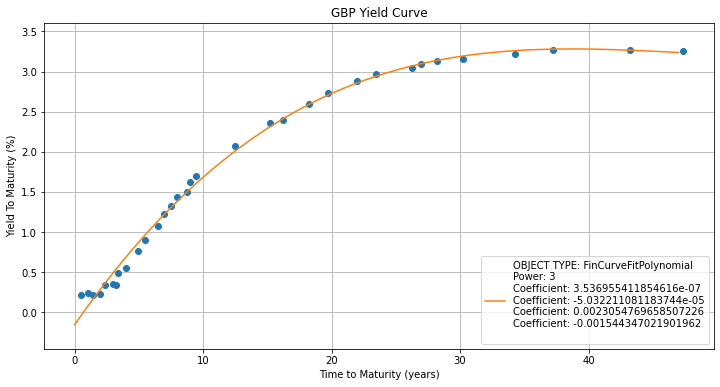

In [8]:
# FIT THE BOND YIELDS TO A CUBIC POLYNOMIAL
curveFitMethod = FinCurveFitPolynomial()
fittedCurve1 = FinBondYieldCurve(settlement, bonds, ylds, curveFitMethod)
fittedCurve1.plot("GBP Yield Curve")

See the cubic coefficients

In [13]:
print(fittedCurve1._curveFit)

OBJECT TYPE: FinCurveFitPolynomial
Power: 3
Coefficient: 3.536955411854616e-07
Coefficient: -5.032211081183744e-05
Coefficient: 0.0023054769658507226
Coefficient: -0.001544347021901962



### Quintic Polynomial

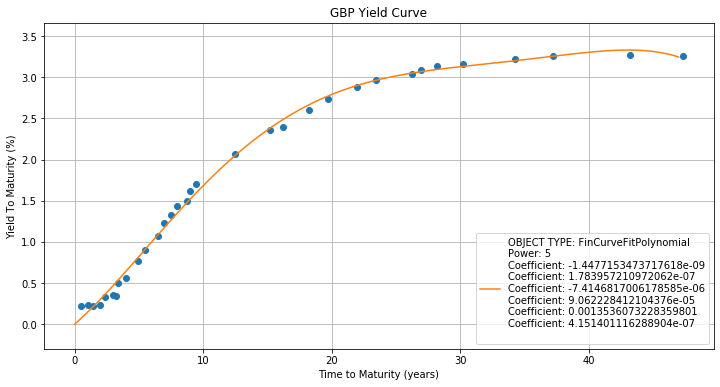

In [14]:
# FIT THE BOND YIELDS TO A QUINTIC POLYNOMIAL
curveFitMethod = FinCurveFitPolynomial(5)
fittedCurve2 = FinBondYieldCurve(settlement, bonds, ylds, curveFitMethod)
fittedCurve2.plot("GBP Yield Curve")

See the quintic coefficients

In [15]:
print(fittedCurve2._curveFit)

OBJECT TYPE: FinCurveFitPolynomial
Power: 5
Coefficient: -1.4477153473717618e-09
Coefficient: 1.783957210972062e-07
Coefficient: -7.4146817006178585e-06
Coefficient: 9.062228412104376e-05
Coefficient: 0.0013536073228359801
Coefficient: 4.151401116288904e-07



### Nelson-Siegel Curve

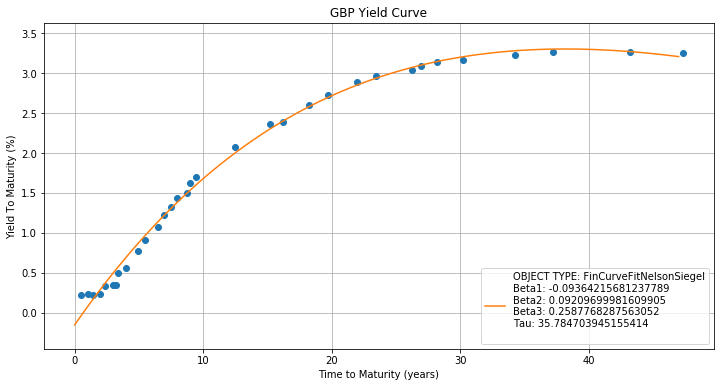

In [16]:
# FIT THE BONDS TO A NELSON-SIEGEL CURVE
curveFitMethod = FinCurveFitNelsonSiegel()
fittedCurve3 = FinBondYieldCurve(settlement, bonds, ylds, curveFitMethod)
fittedCurve3.plot("GBP Yield Curve")

In [18]:
print(fittedCurve3._curveFit)

Beta1: -0.09365251062842019
Beta2: 0.0921073878387712
Beta3: 0.2587915272128999
Tau: 35.762116780739355



### Nelson-Siegel Svensson Curve

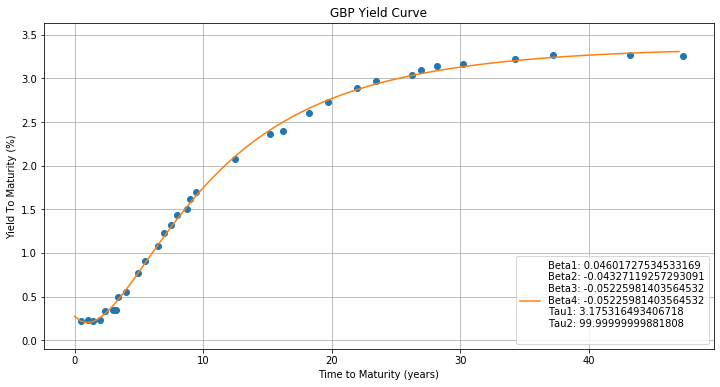

In [19]:
# FIT THE BONDS TO A NELSON-SIEGEL-SVENSSON CURVE
curveFitMethod = FinCurveFitNelsonSiegelSvensson()
fittedCurve4 = FinBondYieldCurve(settlement, bonds, ylds, curveFitMethod)
fittedCurve4.plot("GBP Yield Curve")

In [20]:
print(fittedCurve4._curveFit)

Beta1: 0.04601727534533169
Beta2: -0.04327119257293091
Beta3: -0.05225981403564532
Beta4: -0.05225981403564532
Tau1: 3.175316493406718
Tau2: 99.99999999881808



### B-Spline Curve

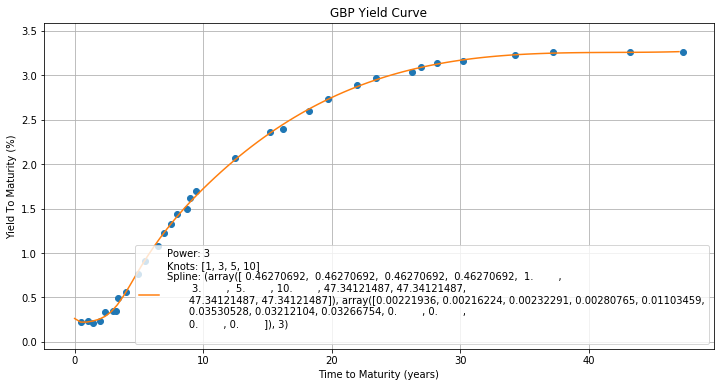

In [21]:
# FIT THE BONDS TO A B-SPLINE CURVE
curveFitMethod = FinCurveFitBSpline()
fittedCurve5 = FinBondYieldCurve(settlement, bonds, ylds, curveFitMethod)
fittedCurve5.plot("GBP Yield Curve")

In [22]:
print(fittedCurve5._curveFit)

Power: 3
Knots: [1, 3, 5, 10]
Spline: (array([ 0.46270692,  0.46270692,  0.46270692,  0.46270692,  1.        ,
        3.        ,  5.        , 10.        , 47.34121487, 47.34121487,
       47.34121487, 47.34121487]), array([0.00221936, 0.00216224, 0.00232291, 0.00280765, 0.01103459,
       0.03530528, 0.03212104, 0.03266754, 0.        , 0.        ,
       0.        , 0.        ]), 3)



## Accessing the Curve

You can access a yield from a date as follows

In [23]:
# EXTRACT A YIELD FROM A FITTED YIELD CURVE
maturityDate = FinDate(2030, 9, 19)
interpolatedYield = fittedCurve5.interpolatedYield(maturityDate)
print(maturityDate, interpolatedYield*100)

THU 19 SEP 2030 2.6018329816487427


## Vectorisations

You can also access the curve using a time and this can be vectorised.

In [24]:
times = np.linspace(0,10,100)

In [25]:
interpolatedYields = fittedCurve5.interpolatedYield(times)

In [26]:
interpolatedYields*100

array([0.26247922, 0.24849404, 0.23767228, 0.2296703 , 0.22414445,
       0.22075109, 0.21914657, 0.21898724, 0.21992946, 0.22162958,
       0.22374403, 0.22601784, 0.22845944, 0.23112591, 0.23407435,
       0.23736187, 0.24104555, 0.2451825 , 0.24982981, 0.25504457,
       0.26088389, 0.26740486, 0.27466458, 0.28272014, 0.29162864,
       0.30144719, 0.31223286, 0.32404277, 0.33693401, 0.35096367,
       0.36618825, 0.38261697, 0.40017902, 0.41879578, 0.43838865,
       0.45887905, 0.48018838, 0.50223804, 0.52494942, 0.54824394,
       0.572043  , 0.59626799, 0.62084033, 0.64568142, 0.67071265,
       0.69585543, 0.72103117, 0.74616127, 0.77116712, 0.79597014,
       0.82049346, 0.84470011, 0.86859302, 0.89217685, 0.91545626,
       0.93843591, 0.96112047, 0.98351459, 1.00562293, 1.02745016,
       1.04900093, 1.07027992, 1.09129177, 1.11204115, 1.13253273,
       1.15277115, 1.17276109, 1.1925072 , 1.21201415, 1.23128659,
       1.25032919, 1.26914661, 1.28774351, 1.30612455, 1.32429

Copyright (c) 2020 Dominic O'Kane